## Benchmarks

In [1]:
import numpy as np
import pandas as pd
import itertools as it
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib

In [2]:
# PALETTE 
col_1 = '#648FFF'
col_2 = '#785EF0'
col_3 = '#DC267F'
col_4 = '#FE6100'
col_5 = '#FFB000'

In [3]:
# fancy palette
col1 = '#f48d48'
col2 = '#59f448'
col3 = '#48aff4'
col4 = '#e348f4'
col5 = '#8d48f4'

col_a = '#dc267fff' # fucsia
col_b = '#0f5e6fff' # blue-green
col_b = '#f28a44ff' # orange

In [4]:
# Function to annotate a matplotlib based heatmap
def annotate_heatmap(im, font_size, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), fontsize=font_size, **kw)
            texts.append(text)

    return texts

In [19]:
# Function to genereate the heatmap
def heat_map_grid(time, input, comb_names, fname):

    #Select specific time
    df = input[time]

    #Select grid size according to the number of pairs
    length = len(df)
    if length == 6:
        x, y = 3, 2
        y_size = 12
        div = 60
        unit = 'min'
    if length == 3:
        x, y = 3, 1
        y_size = 6
        div = 1
        unit = 's'
   
    fig, ax = plt.subplots(nrows = y, ncols = x, figsize=(20,y_size), squeeze=False)
    comb_counter = 0 #pairs counter
    for i in range(y):
        for j in range(x):

            #Select specific pair
            dframe = df[comb_names[comb_counter]]
            comb_counter += 1
            
            im = ax[i,j].imshow(dframe.values/div, cmap='GnBu')

            #x-y ticks and label taken directly from the df (labels are the multiindex first layer)
            x_ticks = [dframe.columns[i][1] for i in range(len(dframe.columns))]
            ax[i,j].set_xticks(ticks=range(len(dframe.columns)), labels=x_ticks)
            
            x_title = dframe.columns[0][0].title()
            ax[i,j].set_xlabel(x_title, fontsize=12)
            
            y_ticks = [dframe.index[i][1] for i in range(len(dframe.index))]
            ax[i,j].set_yticks(ticks=range(len(dframe.index)), labels=y_ticks)
            
            y_title = dframe.index[0][0].title()
            ax[i,j].set_ylabel(y_title, fontsize=12)
            
            title = "{0} vs {1}".format(y_title, x_title)
            ax[i,j].set_title(title, fontsize=14)

            #Set colorbar and its ticks
            cbar = ax[i,j].figure.colorbar(im, ax=ax[i,j])
            vmin, vmax = im.norm.vmin, im.norm.vmax
            num_ticks = 7
            cticks = np.linspace(vmin, vmax, num_ticks)
            cbar.set_ticks(cticks[1:-1])
            cticks_s = ["{0:.1f} {1}".format(val,unit) for val in cticks[1:-1]]
            cbar.set_ticklabels(cticks_s)
            
            texts = annotate_heatmap(im, valfmt="{x:.2f}", font_size=12)
            
    plt.suptitle("Parameters' Heatmap for {0}".format(time.title().replace('_'," ")), fontsize=24)
    plt.savefig(fname+'.png', dpi=800)
    plt.show()        

In [21]:
# Function to genereate one heatmap
def heat_map(time, input, comb_names, unit, fname):

    if unit == 'min':
        div = 60
    if unit == 's':
        div = 1

    #Select specific time
    df = input[time]
   
    fig, ax = plt.subplots(figsize=(10,6))

    dframe = df[comb_names]
            
    im = ax.imshow(dframe.values/div, cmap='GnBu')

    #x-y ticks and label taken directly from the df (labels are the multiindex first layer)
    x_ticks = [dframe.columns[i][1] for i in range(len(dframe.columns))]
    ax.set_xticks(ticks=range(len(dframe.columns)), labels=x_ticks)
            
    x_title = dframe.columns[0][0].title()
    ax.set_xlabel(x_title, fontsize=12)
            
    y_ticks = [dframe.index[i][1] for i in range(len(dframe.index))]
    ax.set_yticks(ticks=range(len(dframe.index)), labels=y_ticks)
            
    y_title = dframe.index[0][0].title()
    ax.set_ylabel(y_title, fontsize=12)
            
    title = "{0} vs {1}".format(y_title, x_title)
    ax.set_title(title, fontsize=14)

    #Set colorbar and its ticks
    cbar = ax.figure.colorbar(im, ax=ax)
    vmin, vmax = im.norm.vmin, im.norm.vmax
    num_ticks = 7
    cticks = np.linspace(vmin, vmax, num_ticks)
    cbar.set_ticks(cticks[1:-1])
    cticks_s = ["{0:.1f} {1}".format(val,unit) for val in cticks[1:-1]]
    cbar.set_ticklabels(cticks_s)
            
    texts = annotate_heatmap(im, valfmt="{x:.2f}", font_size=13)
            
    plt.savefig(fname+'.png', dpi=500)
    plt.show()

In [23]:
# Function to genereate grid of x-y plots
def x_y_plot_grid (time, input, comb_names, parameters, par_names, combinations, fname):

    #Select specific time
    df = input[time]

    #Select grid size and details according to the number of pairs
    length = len(df)
    if length == 6:
        x, y = 3, 2
        y_size = 12
        Top_adj = 0.9
        div = 60
        unit = 'min'
    if length == 3:
        x, y = 3, 1
        y_size = 5
        Top_adj = 0.85
        div = 1
        unit = 's'
   
    fig, ax = plt.subplots(nrows = y, ncols = x, figsize=(20,y_size), squeeze=False)
    comb_counter = 0 #pairs counter
    for i in range(y):
        for j in range(x):

            #Select specific pair
            dframe = df[comb_names[comb_counter]]
            

            for k, fixed in enumerate(parameters[par_names[combinations[comb_counter][1]]]):
                xy_title = dframe.iloc[:,k]
                x_array = range(len(xy_title.index.get_level_values(1).to_numpy()))
                y_array = xy_title.values/div
                ax[i,j].plot(x_array, y_array, label = fixed)
            
            comb_counter += 1
            #x-y ticks and label taken directly from the df (labels are the multiindex first layer)
            x_ticks = [dframe.index[i][1] for i in range(len(dframe.index))]
            ax[i,j].set_xticks(ticks=range(len(dframe.index)), labels=x_ticks)
            
            x_title = dframe.index[0][0].title()
            ax[i,j].set_xlabel(x_title, fontsize=12)
            
            y_title = 'Time ({0})'.format(unit)
            ax[i,j].set_ylabel(y_title, fontsize=12)

            legend_title = dframe.columns[0][0].title()
            ax[i,j].legend(title=legend_title,alignment='center',title_fontsize = 14,loc = 'best')
            
            title = "{0} Time Trend for fixed {1}".format(x_title, legend_title)
            ax[i,j].set_title(title, fontsize=14)
            ax[i,j].grid()
                        
    plt.suptitle("Time Trends for {0}".format(time.title().replace('_'," ")), fontsize=25)
    plt.subplots_adjust(top=Top_adj)
    plt.savefig(fname+'.png', dpi=800)
    plt.show()

In [25]:
# Function to genereate one x-y plot (put combination as tuple of names and preferred fixed index as 0 or 1)
def x_y_plot (time, input, comb_names, parameters, fixed_par, unit, fname):

    if unit == 'min':
        div = 60
    if unit == 's':
        div = 1

    for i, stri in enumerate(comb_names):
        if stri == fixed_par:
            fixed_index = i
            
    #Select specific time
    df = input[time]
   
    fig, ax = plt.subplots(figsize=(10,6))
    
    #Select specific pair
    dframe = df[comb_names]
            

    for k, fixed in enumerate(parameters[fixed_par]):
        if fixed_index == 0:
            xy_title = dframe.iloc[k,]
        if fixed_index == 1:
            xy_title = dframe.iloc[:,k]
        x_array = range(len(xy_title.index.get_level_values(fixed_index).to_numpy()))
        y_array = xy_title.values/div
        ax.plot(x_array, y_array, label = fixed)
            
    #x-y ticks and label taken directly from the df (labels are the multiindex first layer)
    if fixed_index == 0:
        x_ticks = [dframe.columns[i][1] for i in range(len(dframe.columns))]
        ax.set_xticks(ticks=range(len(dframe.columns)), labels=x_ticks)
        x_title = dframe.columns[0][0].title()
        legend_title = dframe.index[0][0].title()
        
    if fixed_index == 1:
        x_ticks = [dframe.index[i][1] for i in range(len(dframe.index))]
        ax.set_xticks(ticks=range(len(dframe.index)), labels=x_ticks)
        x_title = dframe.index[0][0].title()
        legend_title = dframe.columns[0][0].title()

    ax.set_xlabel(x_title, fontsize=12)
    y_title = 'Time ({0})'.format(unit)
    ax.set_ylabel(y_title, fontsize=12)
    ax.legend(title=legend_title,alignment='center',title_fontsize = 14,loc = 'best')
            
    title = "{0} Time Trend for fixed {1}".format(x_title, legend_title)
    ax.set_title(title, fontsize=14)
    ax.grid()
                        
    plt.savefig(fname+'.png', dpi=500)
    plt.show()

In [9]:
#output files
output_file_1 = 'time_output_1.pkl'
output_file_2 = 'time_output_2.pkl'

#reading pickles
with open(output_file_1, "rb") as fill:
    input_1 = pickle.load(fill)
    par_names_1 = input_1[0]
    parameters_1 = input_1[1]
    combinations_1 = input_1[2]
    comb_names_1 = input_1[3]
    times_1 = input_1[4]
    output_times_1 = input_1[5]

#reading pickles
with open(output_file_2, "rb") as fill:
     input_2 = pickle.load(fill)
     par_names_2 = input_2[0]
     parameters_2 = input_2[1]
     combinations_2 = input_2[2]
     comb_names_2 = input_2[3]
     times_2 = input_2[4]
     output_times_2 = input_2[5]

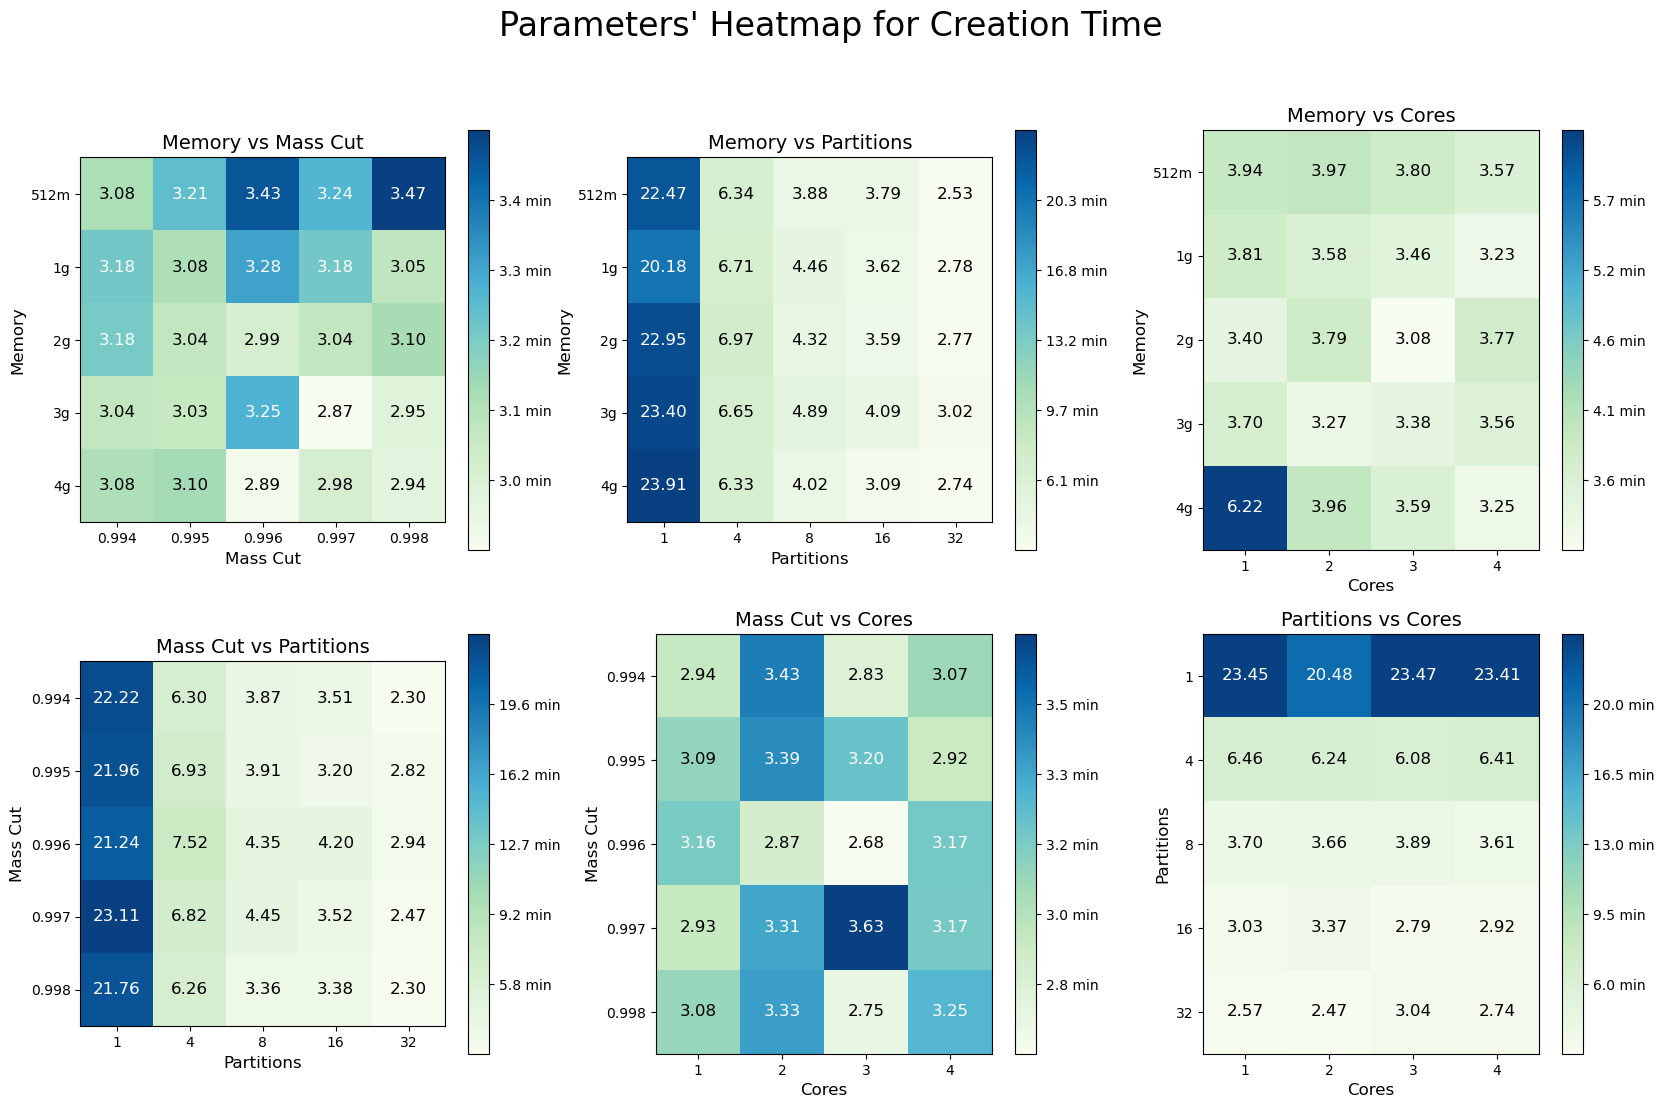

In [20]:
heat_map_grid(times_1[0], output_times_1, comb_names_1, 'complete_creation_heatmaps')

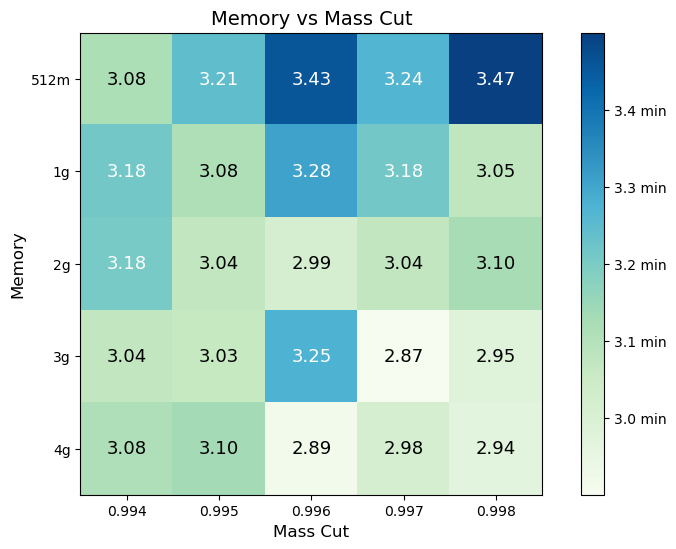

In [22]:
heat_map('creation_time', output_times_1, ('memory','mass cut'), 'min', 'creation_mem_cut')

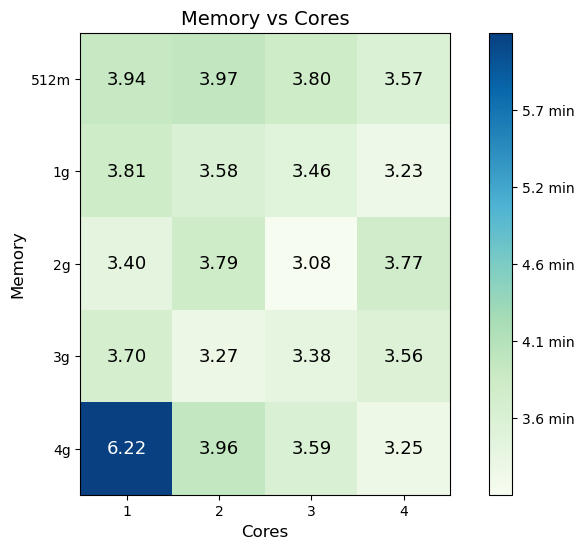

In [35]:
heat_map('creation_time', output_times_1, ('memory','cores'), 'min', 'creation_mem_cores')

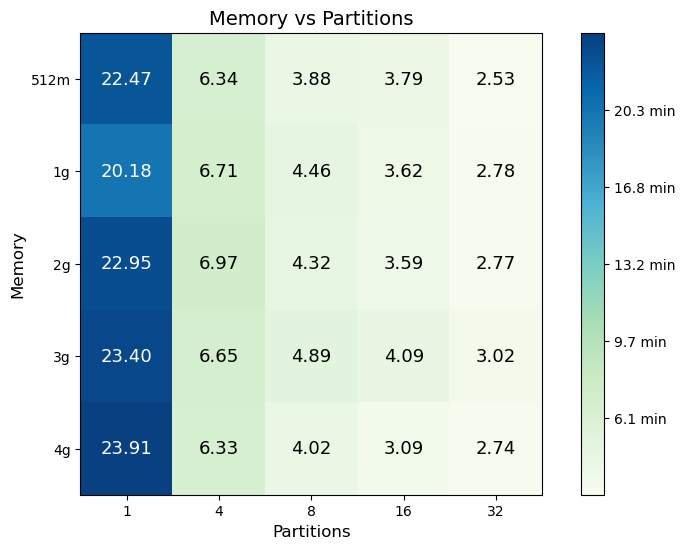

In [36]:
heat_map('creation_time', output_times_1, ('memory','partitions'), 'min', 'creation_mem_part')

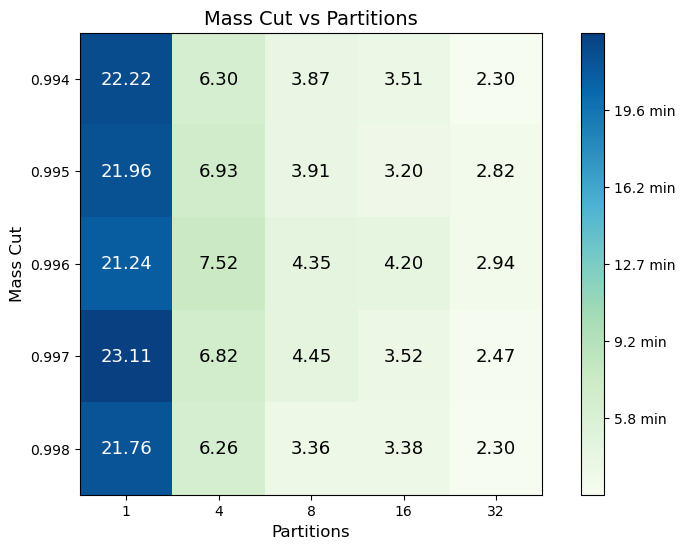

In [38]:
heat_map('creation_time', output_times_1, ('mass cut','partitions'), 'min', 'creation_part_cut')

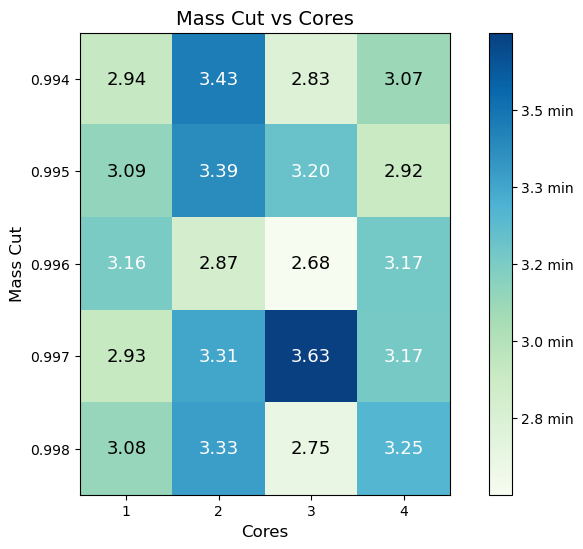

In [39]:
heat_map('creation_time', output_times_1, ('mass cut','cores'), 'min', 'creation_cores_cut')


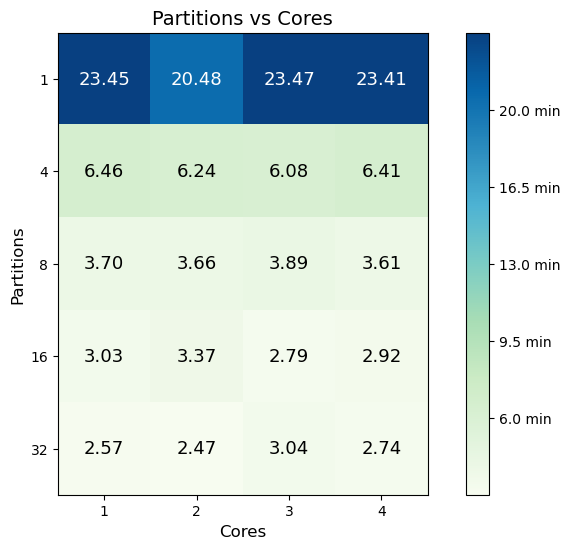

In [40]:
heat_map('creation_time', output_times_1, ('partitions','cores'), 'min', 'creation_part_cores')

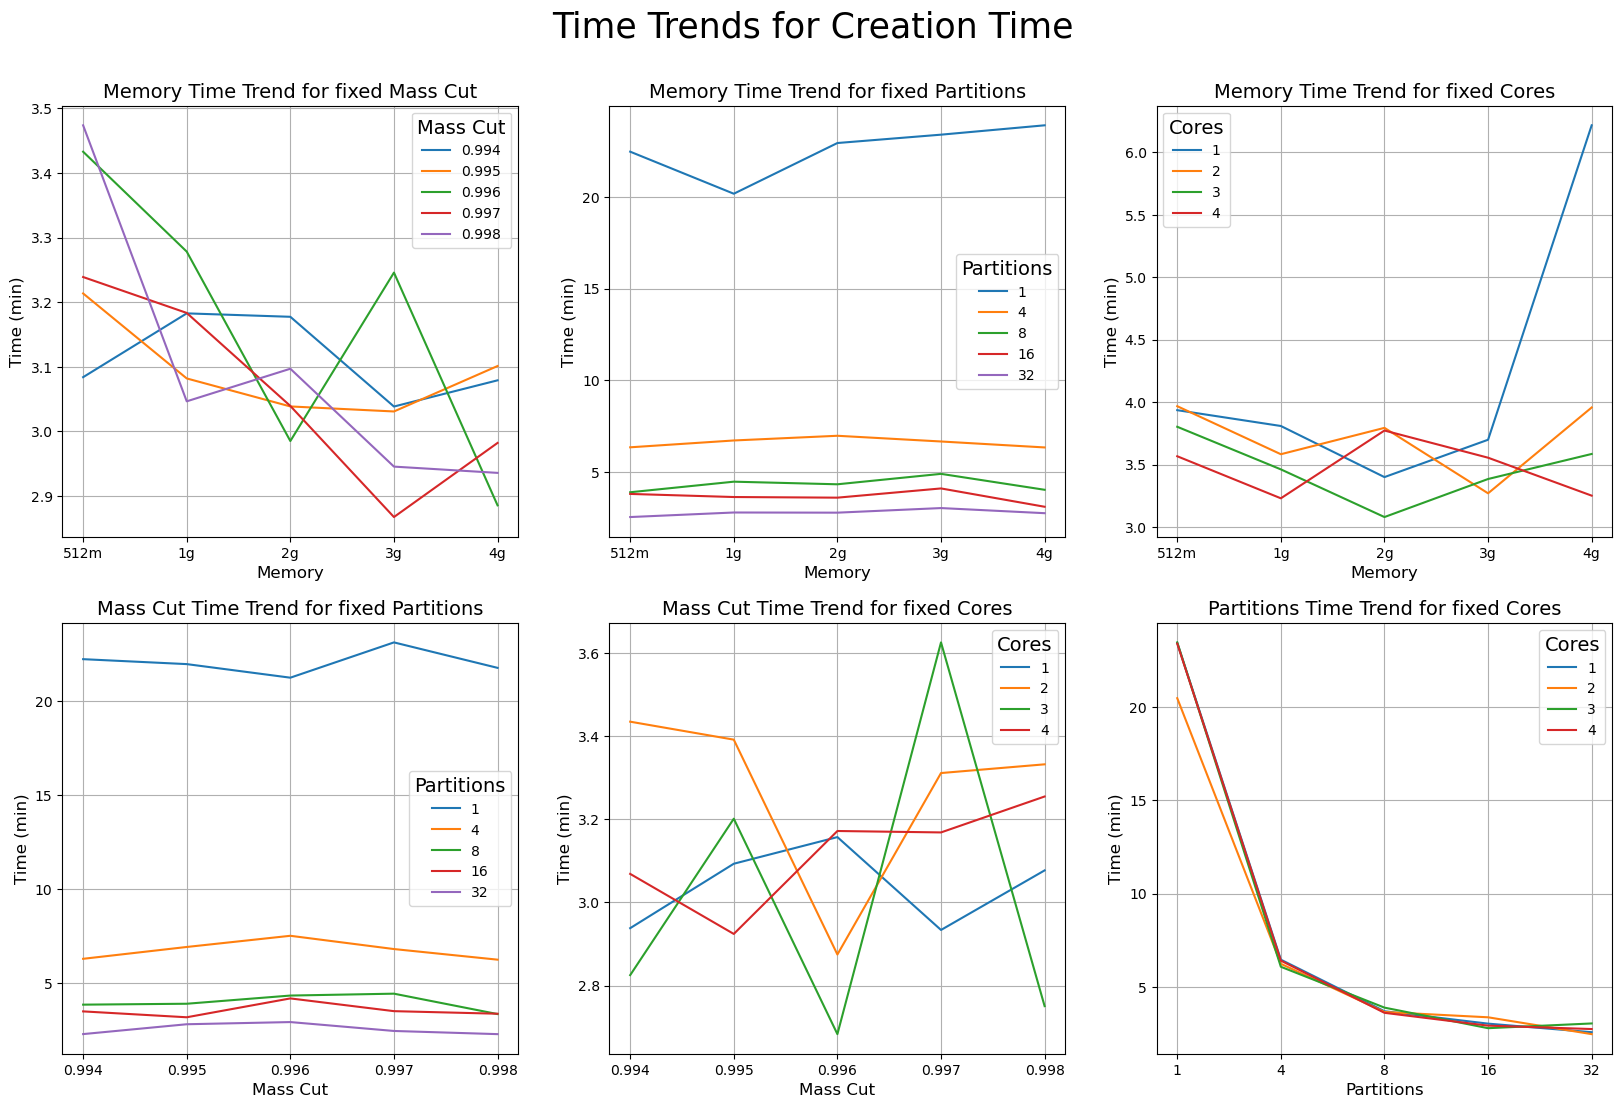

In [24]:
x_y_plot_grid(times_1[0], output_times_1, comb_names_1, parameters_1, par_names_1, combinations_1, 'creation_trends')

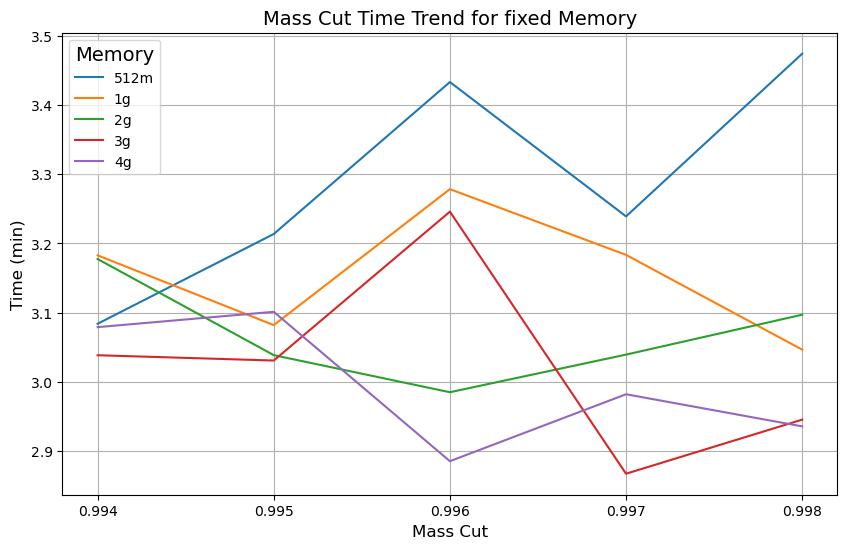

In [26]:
x_y_plot ('creation_time', output_times_1, ('memory','mass cut'), parameters_1, 'memory', 'min', 'cuts_trend_creation')

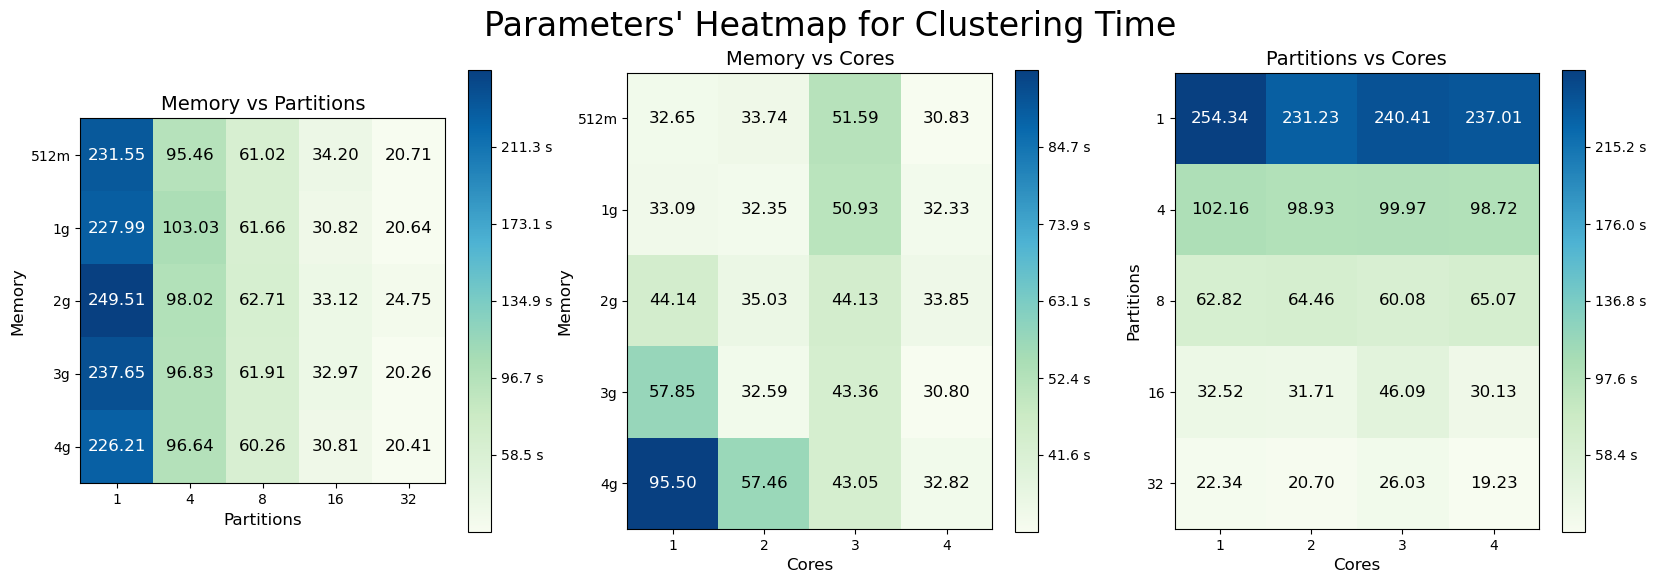

In [27]:
heat_map_grid(times_2[0], output_times_2, comb_names_2, 'clustering_1000_complete')

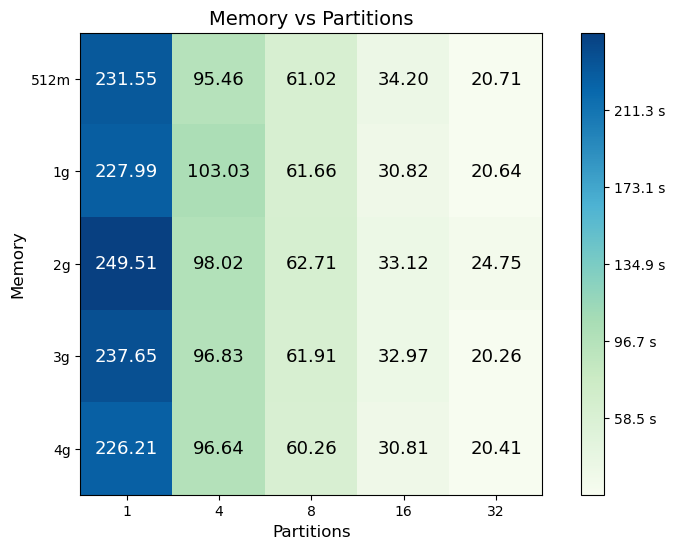

In [28]:
heat_map('clustering_time', output_times_2, ('memory','partitions'), 's', 'clustering_mem_part_1000')

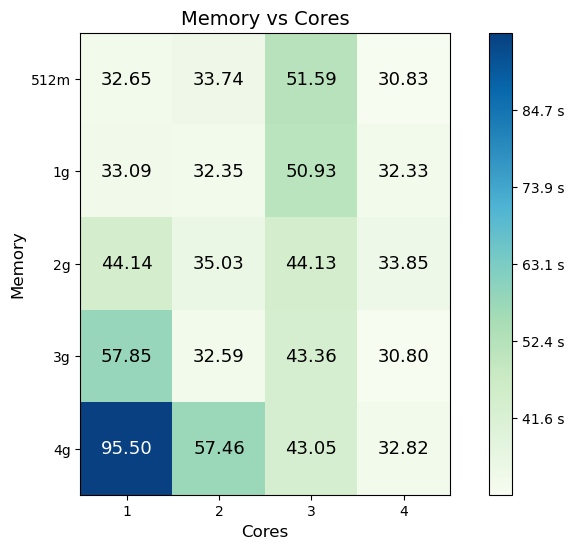

In [42]:
heat_map('clustering_time', output_times_2, ('memory','cores'), 's', 'clustering_mem_cores_1000')

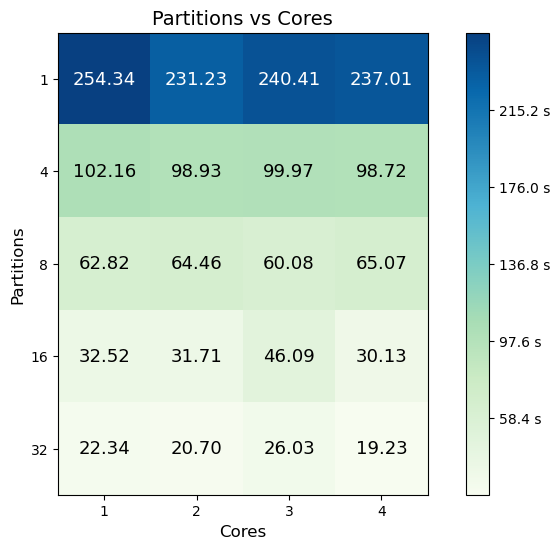

In [43]:
heat_map('clustering_time', output_times_2, ('partitions','cores'), 's', 'clustering_cores_part_1000')

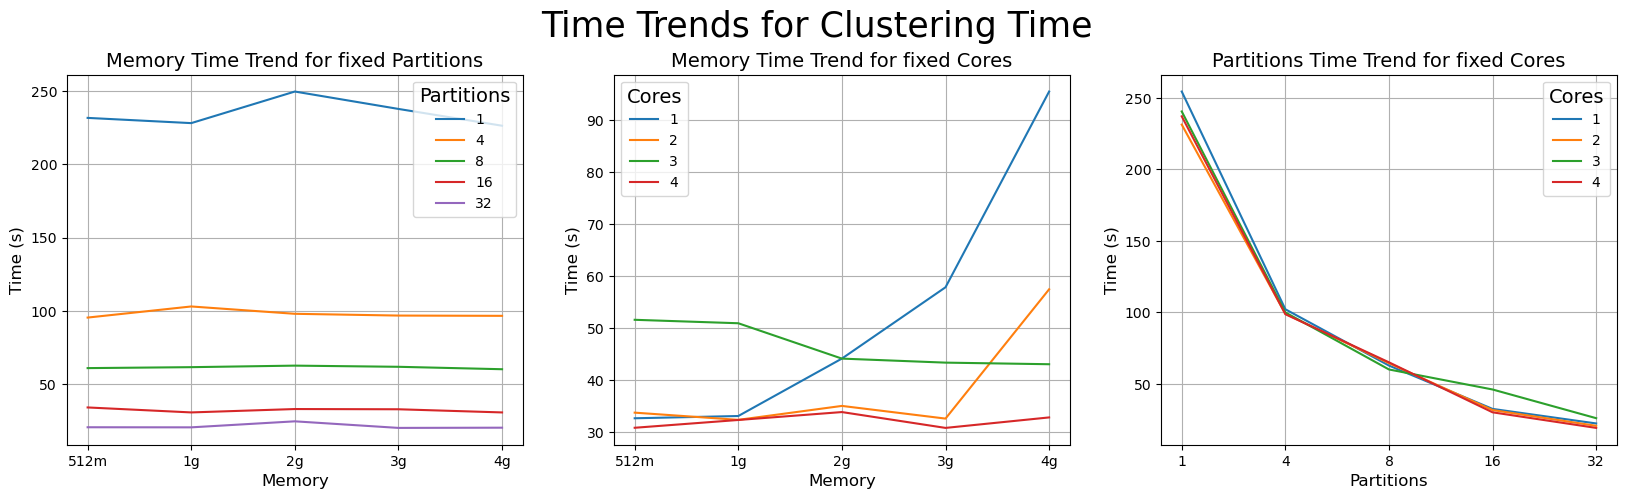

In [29]:
x_y_plot_grid(times_2[0], output_times_2, comb_names_2, parameters_2, par_names_2, combinations_2, 'clustering_trends_1000')

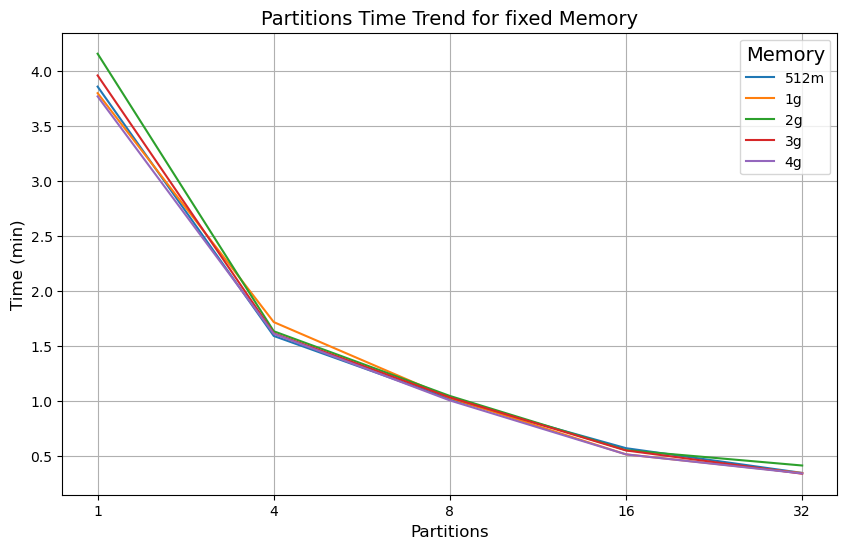

In [30]:
x_y_plot('clustering_time', output_times_2, ('memory','partitions'), parameters_2, 'memory', 'min', 'clustering_part_mem_1000')

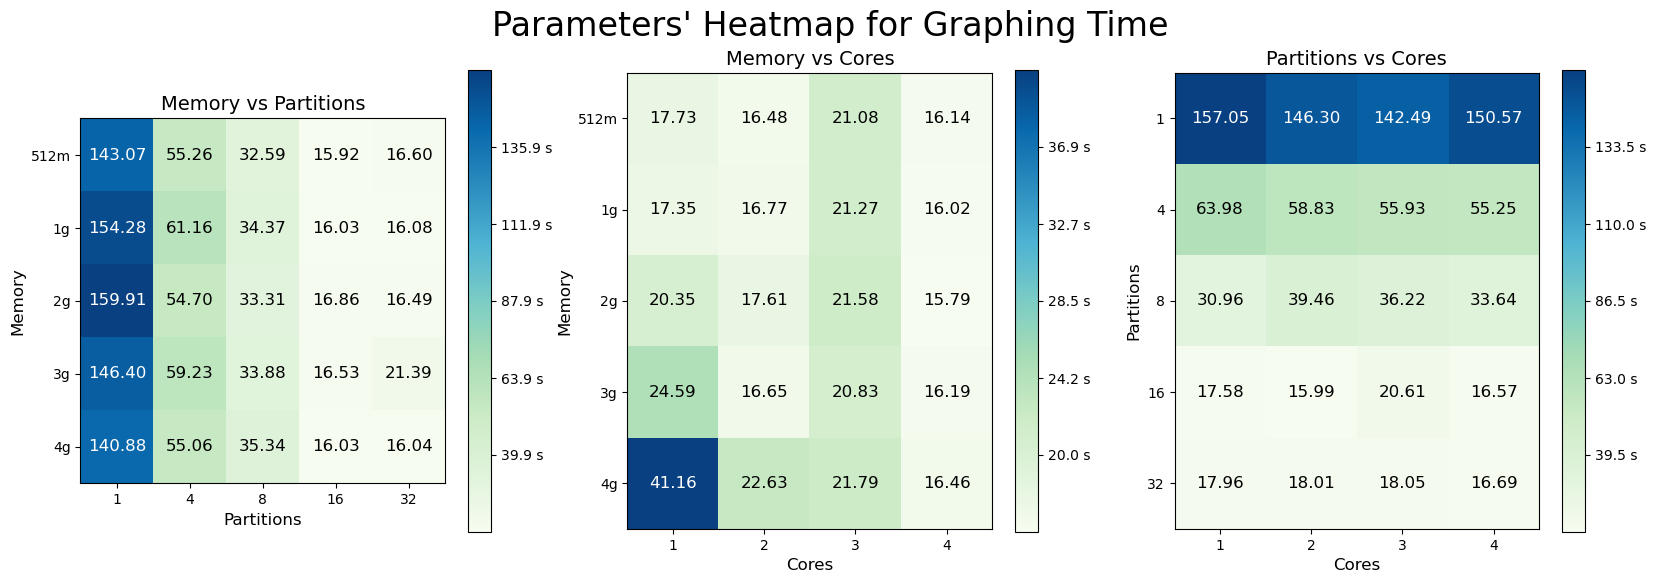

In [31]:
heat_map_grid(times_2[1], output_times_2, comb_names_2, 'graph_complete_1000')

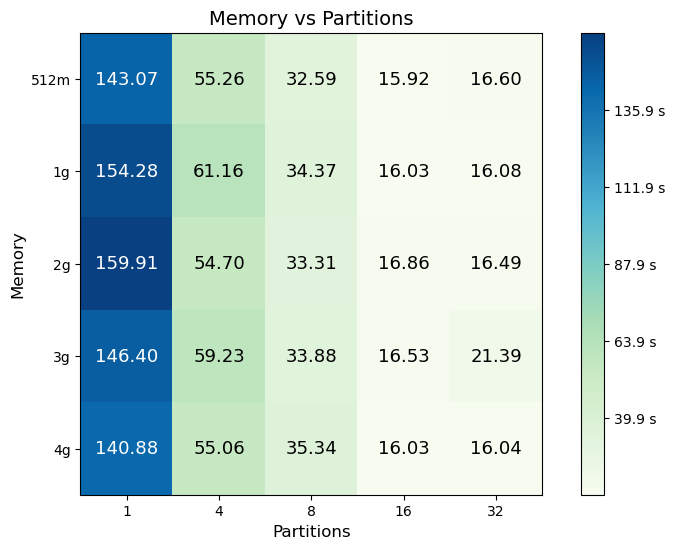

In [32]:
heat_map('graphing_time', output_times_2, ('memory','partitions'), 's', 'graph_mem_part_1000')

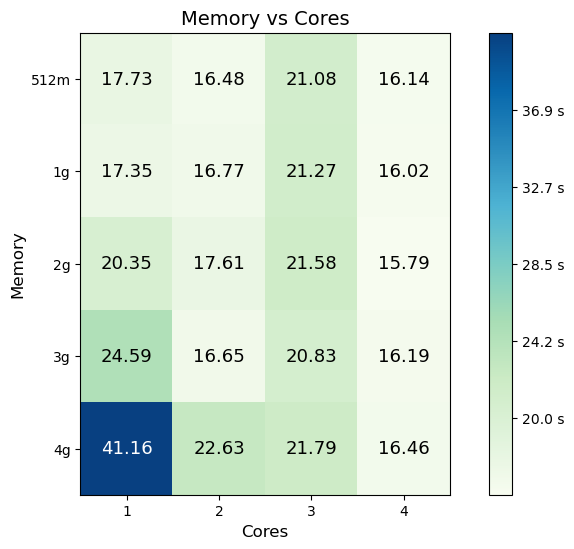

In [44]:
heat_map('graphing_time', output_times_2, ('memory','cores'), 's', 'graph_mem_cores_1000')


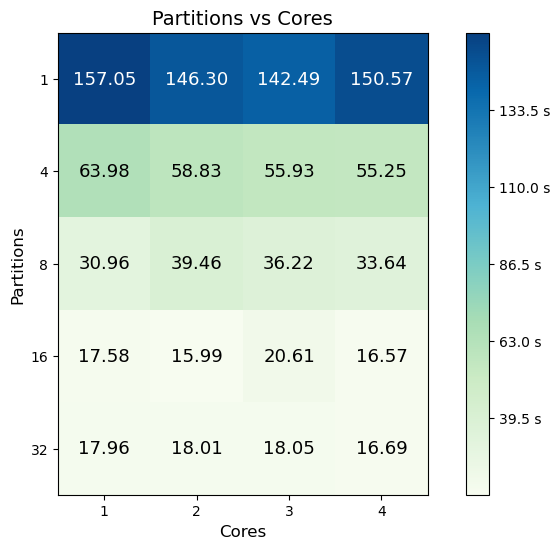

In [45]:
heat_map('graphing_time', output_times_2, ('partitions','cores'), 's', 'graph_cores_part_1000')

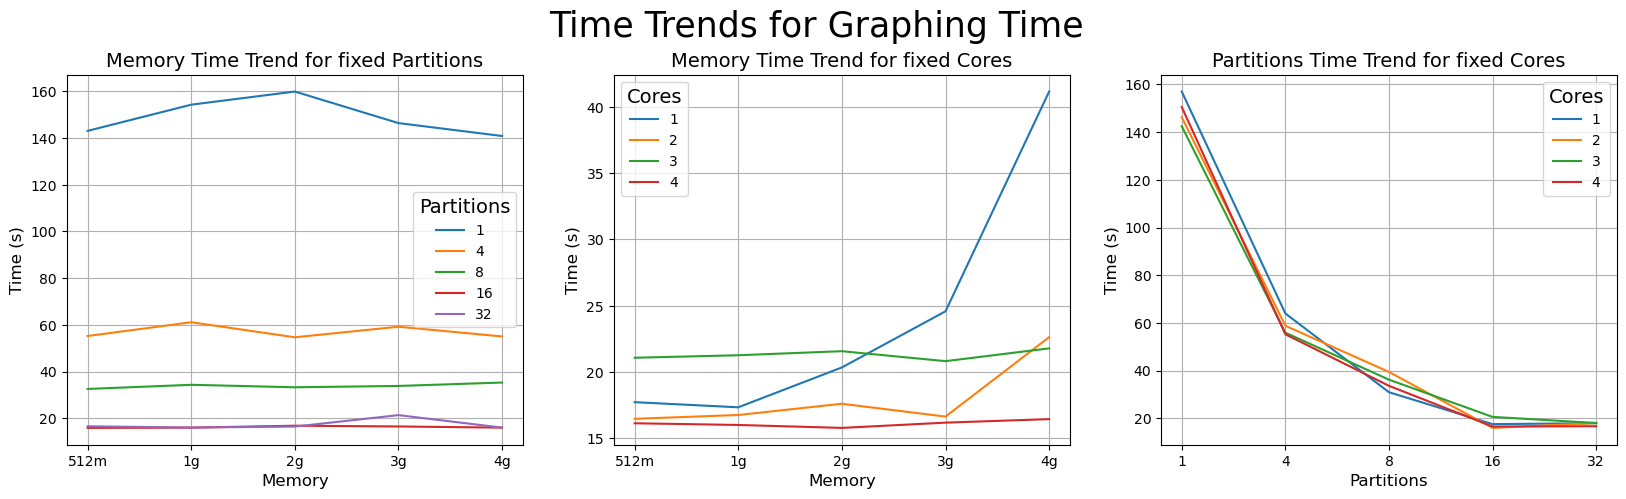

In [33]:
x_y_plot_grid(times_2[1], output_times_2, comb_names_2, parameters_2, par_names_2, combinations_2, 'graph_trends_1000_complete')

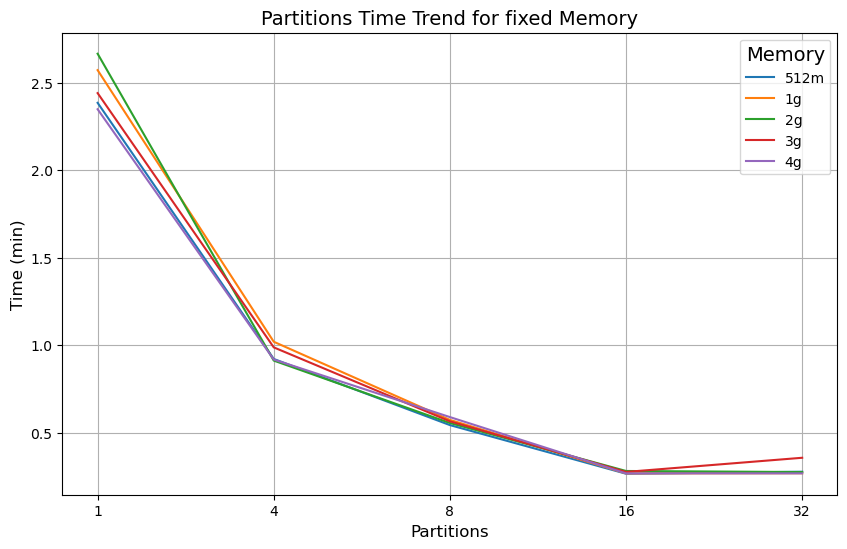

In [34]:
x_y_plot('graphing_time', output_times_2, ('memory','partitions'), parameters_2, 'memory', 'min', 'graph_trend_part_mem_1000')